# Problem 4: The ferromagnetic Ising model

## a) Simulating the Ising model with MCMC

Here we simulate the Ising model on a random graph via the Metropolis algorithm, which sets the transition probabilities between spin states:

$$
P(s_i \rightarrow -s_i) = min\left[1, e^{-\beta(E(\{-s_i\}) - E(\{s_i\})})\right]
$$

# of flip tries: 20000


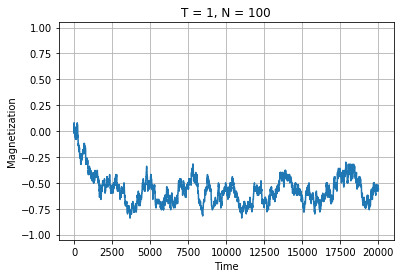

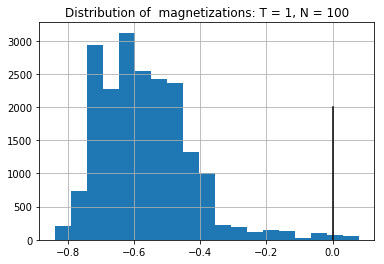

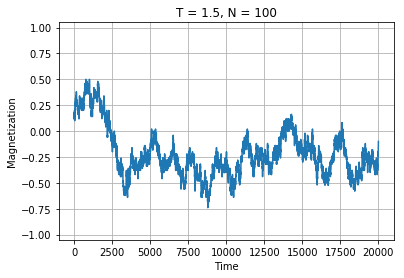

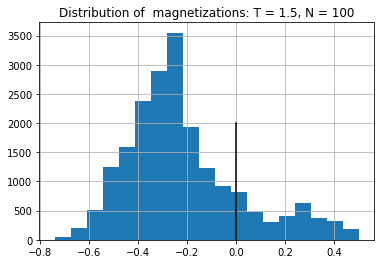

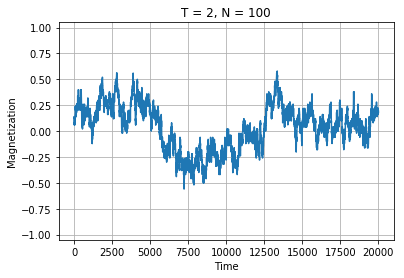

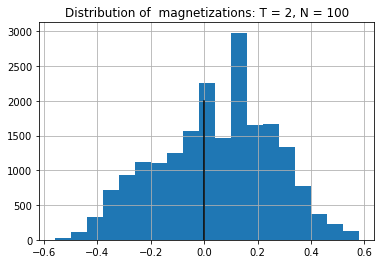

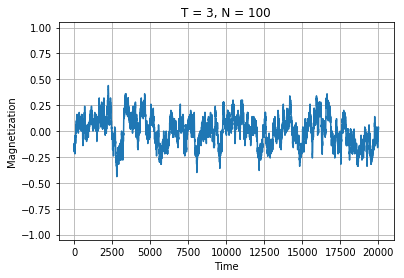

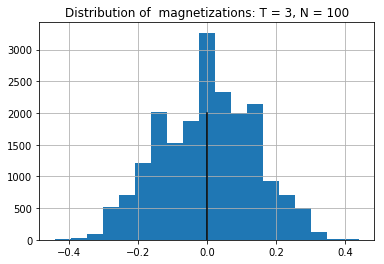

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from networks_sup import *


# size of graph
N = 100 # has to be >= 5

# temperatures
Ts = [1, 1.5, 2, 3]

# runs per given pi
times = 1 

num = 21
ps = np.linspace(0,1, num)

ps = [0.3]
mms = []

points = 20000
mini_steps = 1

print("# of flip tries:", points*mini_steps)

for pi in ps:
    mms = []
    for t in range(len(Ts)):
        T = Ts[t]
        mm = []
        graph = generate(N, pi)
        graph.start_spins()
        for step in range(points):
            for mini_step in range(mini_steps):
                flip(graph, T)
            mm.append(magnetization(graph))
        mms.append(mm)
        
        plt.figure()
        plt.ylim([-1.05, 1.05])
        plt.grid()
        plt.plot(mms[t], '-')
        plt.title("T = " + str(Ts[t]) + ", N = " + str(N))
        plt.ylabel("Magnetization")
        plt.xlabel("Time")
        
        plt.figure()
        plt.title("Distribution of  magnetizations: T = " + str(Ts[t]) + ", N = " + str(N))
        plt.hist(mm, bins=19)
        plt.plot([0,0], [0, points/10], 'k-')
        plt.grid()
        plt.show()





    

One can try to infer the phase transition temperature $T_c$ as the temperature at which the magnetization histogram's peak either noticably shifts away from zero or if the histogram separates into two distinct normal distributions.

**May not be true due to parameter changing:**

Above we see that at $T=2$ has these two "gaussians" rather symmetrically around zero, hinting at two possible equilibrium magnetizations.

On the other hand for $T=3$ the distribution in centered around 0, so we expect no ferromagnetic behaviour. The evolution of the magnetization for $T=3$ corroborates this expectation.

The above method does not seem to be very precise unless very many iterations are used.

## b) Belief propagation (BP)

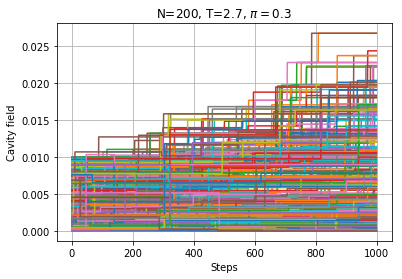

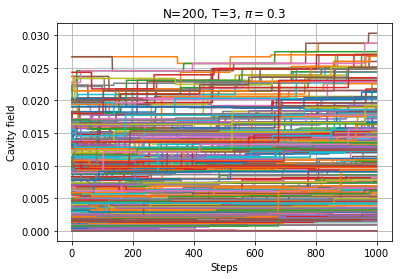

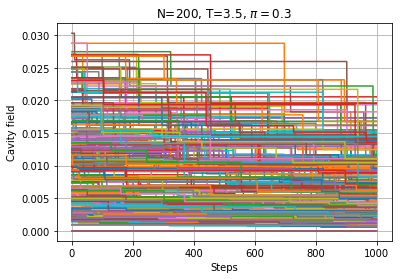

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from networks_sup import *

steps = 1000
Ts = [2.7, 3, 3.5]

N = 200
pi = 0.3

gg = generate(N, pi)
gg.start_fields()


for T in Ts:
    ff = []
    f0 = []
    for i in range(steps):
        f = []
        gg.propagate(T)
        for j in range(len(gg.graph_dict)):
            f.append(gg.field_dict[j])
        flat = [h for arr in f[:] for h in arr]
        ff.append(flat)
    

    ff = np.asarray(ff)

    plt.figure()
    plt.title("N=" + str(N) + ", T=" + str(T) + r', $\pi=$' + str(pi))
    plt.ylabel("Cavity field")
    plt.xlabel("Steps")
    plt.plot(ff)
    plt.grid()
    plt.show()

## c) Population dynamics & Analytical phase diagram

### Population dynamics

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from networks_sup import *

M = 4000

Ts = [1, 1.5, 2, 3]
Ts = [0.1]

Ts = np.linspace(0.5,5,10)

times = 1 # runs per given pi

num = 21
ps = np.linspace(0,1, num)
fields = np.random.uniform(0, 1, M)

ps = [1]

magns = []

for pi in ps:
    for t in range(len(Ts)):
        T = Ts[t]
        #print(T)
        fields = np.random.uniform(0, 1, M)
        run = 1
        for step in range(points):
            while run:
                d = 1
                if np.random.uniform() < 4*pi / (1 + 3*pi):
                    d = 4
                ids = np.random.choice(np.arange(M), d+1, replace=False)
                idd = np.random.choice(ids)
                ids = [i for i in ids if i != idd]
                temp_h = 0
                for l in ids:
                    temp_h += T/2*np.log((np.cosh( (fields[l]+1)/T ) / np.cosh( (fields[l]-1)/T) )) 
                fields[idd] = temp_h
                if np.std(fields) < 0.001:
                    run = 0
        magns.append(np.mean(fields))
        #plt.figure()
        #plt.hist(fields, bins = 21)
        #plt.show()

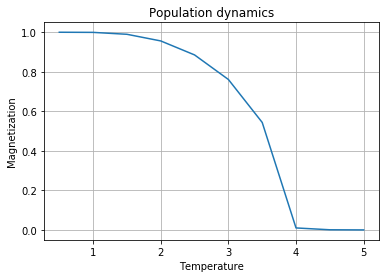

In [76]:
plt.figure()
plt.ylabel("Magnetization")
plt.xlabel("Temperature")
plt.title("Population dynamics")
plt.grid()
plt.plot(Ts, np.tanh(magns/Ts))
plt.show()

### Phase diagram

Here we check whether a small perturbation of the cavity field distribution dies out (system returns to paramagnetic phase) or grows (becomes ferromagnetic).

In the following $P_c$ denotes $P_{cav}$ for brevity. From using the general formula: 

$$
P_c(h) = \sum_d q_{d+1} \int dh_1 .. dh_d P_c(h_1)..P_c(h_d)\  \delta\left[h - 1/2\beta \sum_1^d \log\left(\frac{ch\beta(h_l+1)}{ch\beta(h_l-1)}\right)\right]
$$

which in our case becomes this:
$$
P_c(h) = q_1 \delta(h) + q_4 \int dh_1..dh_3 P_c(h_1)..P_c(h_3)\ \delta\left[h - 1/2\beta \sum_1^3 \log\left(\frac{ch\beta(h_l+1)}{ch\beta(h_l-1)}\right)\right]
$$
Following the derivation in class: after carrying out the integration over $h$, expanding around $h=0$, we arrive at the final thing, similar to what we did in class:

\begin{equation}
\varepsilon_1 = 3 q_3 \tanh(\beta) \int dh P^0_c(h) h = 3 q_3 \tanh(\beta) \varepsilon_0
\end{equation}
then
\begin{equation}
\frac{3 \cdot 4 \pi}{1+3\pi}tanh(\beta) = 1
\end{equation}

giving the critical $\pi$ below which the system should be paramagnetic for any T as $\pi_c = 1/9$, which is not entirely surprsing, as that $\pi_c = 1/9$ is also the probability at which the giant component emerges, as shown before.


And before there is a giant component, we expect the small non-giant components to average out their total magnetization to zero.

From this equation we can also find the $T_c(\pi)$:

$$
T_c(\pi) = \frac{1}{tanh^{-1}\left(\frac{1+3\pi}{12\pi}\right)}
$$

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arctanh
  from ipykernel import kernelapp as app


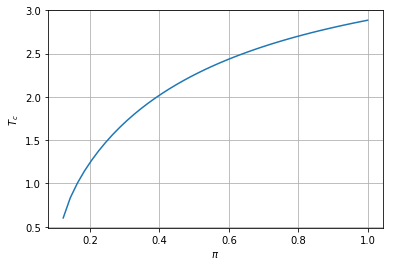

In [35]:
pi = np.linspace(0, 1, 50)
Tc = 1/(np.arctanh((1+3*pi) / 12/pi))

plt.figure()
plt.plot(pi, Tc)
plt.grid()
plt.xlabel(r'$\pi$')
plt.ylabel(r'$T_c$')
plt.show()

Below the curve we expect the graph to be ferromagnetic, above it - paramagnetic. The curve stops at $\pi_c=1/9$.

Another interesting observation to be made is that there exists a temperature above the graph will __always__ be paramagnetic:

In [38]:
Tc[-1]

2.8853900817779268